# Инструкция по загрузке данных и удобной работе с ними

Для начала импортируем файл с классом для загрузки данных.

Вместе с ним импортируются все необходимые для работы библиотеки.

In [31]:
import sys
sys.path.insert(0, 'basic_codes')

import class_magnesium_not_drop_na #_transform_pairings
from class_magnesium_not_drop_na import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from CatBoost import CatBoostClassifier

ModuleNotFoundError: No module named 'CatBoost'

### Прописываем пути до файлов

In [3]:
fold = '../'
file_train = 'train.csv'
file_test = 'test.csv'
file_submit = 'sample_submission.csv'

### Функция для обновления класса
Если вы что-то изменили в class_magnesium_not_drop_na.py, но не хотите перезагружать ядро(чтобы не потерять какие-либо данные), воспользуйтесь этой ячейкой.

In [3]:
import importlib
importlib.reload(class_magnesium_not_drop_na)
from class_magnesium_not_drop_na import *

### Инициируем класс 

In [4]:
'''
    Класс Magnesium загружает данные из файла file_, находящегося в папке fold. Делает dropna (чтобы кас не ругался)
    model - модель, с которой вы хотите работатьб по умолчанию RFC
    Сохраняет переменные:
    data - загруженный DataFrame
    features - признаки
    groups - цепочки
    x - данные для бучения в виде Numpy-матрицы
    y - целевой признак
'''
model = RandomForestClassifier(n_jobs=-1, random_state=17, n_estimators=20, max_features=15)
m = Magnesium(file_train, fold = fold, model = model)   # Можно написать любую свою модель

Everything is OK. Ready for your experiments!

In [10]:
np.unique(m.y, return_counts=True)

(array([0, 1]), array([180678,  28365]))

In [27]:
m.model = GradientBoostingClassifier(random_state=17)

HBox(children=(IntProgress(value=1, bar_style='info', description='Splits', max=1), HTML(value='')))

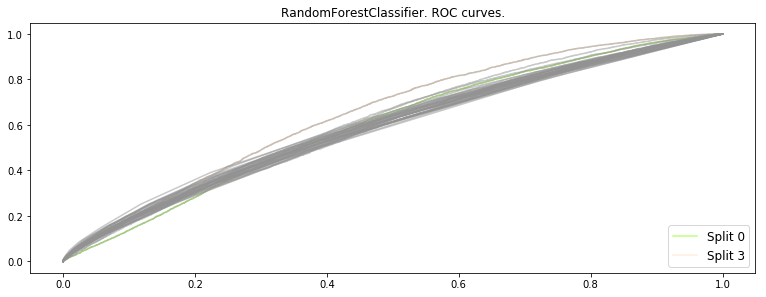

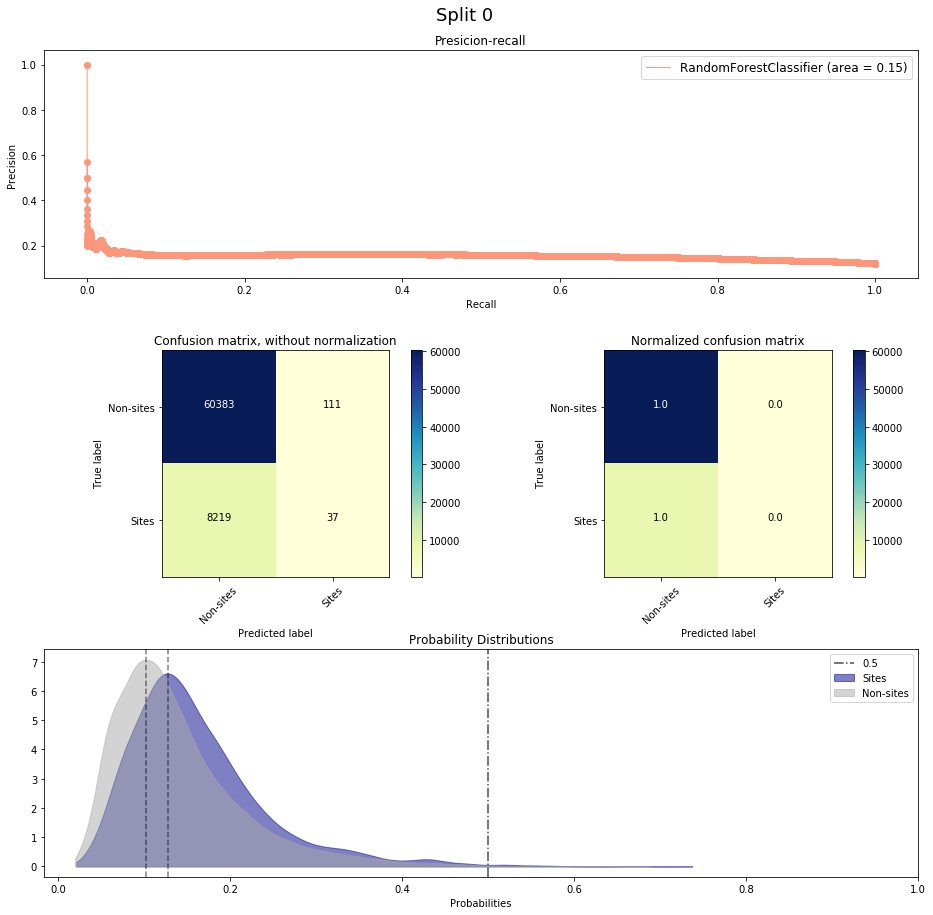

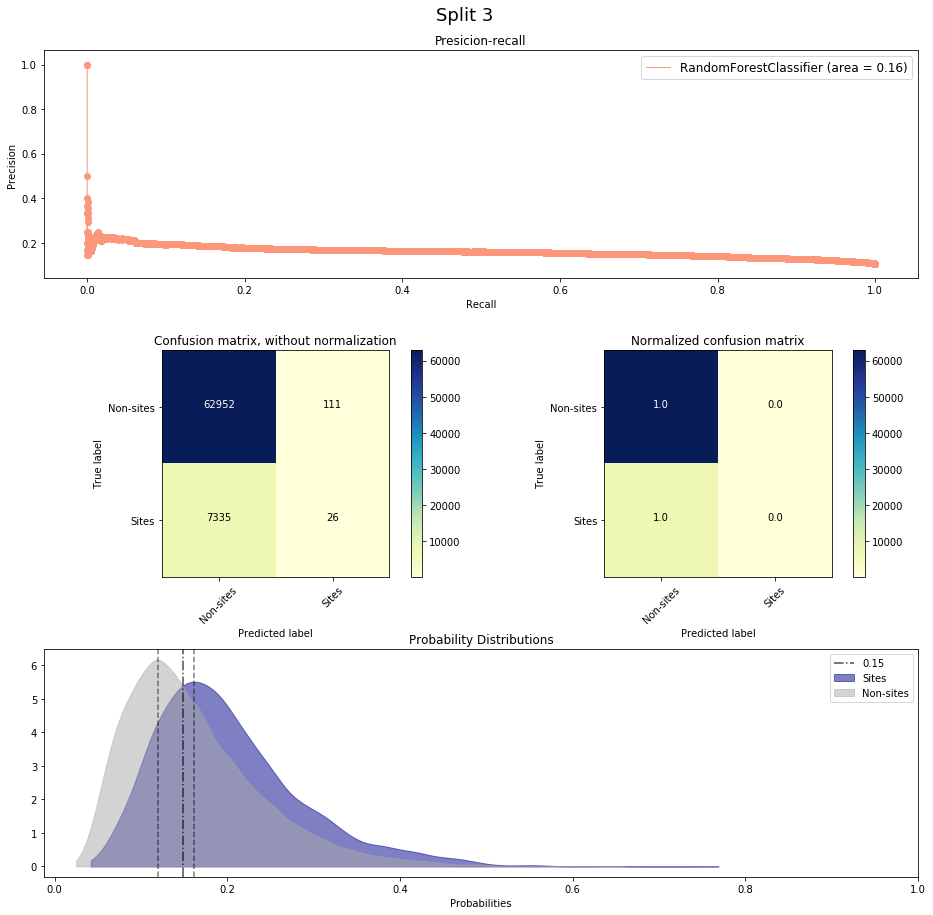

In [28]:
# P.s. эта ячейка порождает много графиков, чтобы не пришлось их скроллить Cell -> Current Outputs -> Toggle Scrolling
'''
  fit_predict осуществляет кроссвалидацию по следуюещему пайплайну:
            если with_groups = True делит выборку с помощью GroupShuffleSplit,
            если False - StratifiedShuffleSplit. 
            C биологической точки зрения логичнее делать разбиения с учетом групп, 
            так как группами являются цепочки => хорошо иметь данные всей цепочки в трейне.
  n_splits, test_size - параметры, окторые передаются GroupShuffleSplit или StratifiedShuffleSplit
  model - можете написать любую свою модель, по дефолту будет брать ту, которая была заложена при создании класса.
  plots - рисовать графики (ROC-AUC, precision-recall, confusion matrix, probability-densities) или нет
  plot_splits - для каких разбиений рисовать графики (разиения нумеруются с 0). По дефолту рисуется для последнего разюиения.
  x , y  - при желании можете подставить свои данные для кросс валидации. По дефолту берет загруженную выборку.
  
  Возвращает словарь с ключами:
  'test score', 'train score' - f1_score на всех сплитах
  'roc_auc': данные функции sklearn.metrics.roc_curve(y_test, y_prob)
  'prec_rec':[precision, recall, average_precision_score, prec_recall_plot]
  'confusion': [cnf_matrix, cnf_normed, cnf_plot, cnf_normed_plot] (normed - означает нормированная матрица)
  'plots':{'roc_auc', 'prec_recall', 'cnf_normed', 'cnf', 'prob_density'}
'''
data = m.fit_predict(n_splits = 5, plot_splits = [0,3]);

In [29]:
"""
RF (rs=17, ne=1000):
([0.012501502584445247,
  0.011428571428571429,
  0.009985157198758603,
  0.012390572390572391,
  0.004012036108324975],
 [1.0, 1.0, 1.0, 1.0, 1.0])
None:
([0.04242491905772022,
  0.033426762171701443,
  0.03719994972979767,
  0.047205576617341316,
  0.040411118897453864],
 [0.970315162923206,
  0.969659707557005,
  0.969154617053961,
  0.9704651615414559,
  0.9709238314483035])
"""
data['test score'], data['train score'] #, data["prec_rec"]

([0.02345415778251599,
  0.016461785141635488,
  0.024354731965585703,
  0.019838645681788124,
  0.023332923983789756,
  0.03992699064567647,
  0.02928563957745006,
  0.03185930929017459,
  0.03655750190403656,
  0.047708578143360755,
  0.0320490964882373,
  0.024944974321349966,
  0.033205619412515965,
  0.043835616438356165,
  0.03533484541005133,
  0.017846519928613917,
  0.015422512584341866,
  0.028072033898305083,
  0.021445591739475772,
  0.019283065512978984,
  0.014086188372925868,
  0.0051813471502590676,
  0.005379959650302623,
  0.011489645958583834,
  0.014892032762472078,
  0.012912482065997133,
  0.004756756756756757,
  0.014150313709785076,
  0.006742179072276159,
  0.006476522605554863,
  0.012441679626749611,
  0.00969200947663149,
  0.01044316508234034,
  0.015025489669975854,
  0.010928961748633878,
  0.008805330794859591,
  0.001731789154670419,
  0.009919571045576408,
  0.006935182715390771,
  0.008172362555720654],
 [0.9905029192873431,
  0.9906084760476679,
  0.

In [37]:
f1_score([1, 0, 1], [1, 1, 1])

0.8

In [38]:
def load_data(filename):
    '''
        Функция для загрузки датасета без инициализации класса. 
        
        Возвращает:
         data - полный DataFrame
         fetures - список признаков для обучения/предсказания
         x - датасет для тренировки/предсказания в формате np.array
         y - целевой признак, если он есть. В случае с тестовым датасетом возвращает None
    '''
    
    data = pd.read_table(filename, sep=',').dropna()    
    
    data = data[~(data['chainlen']>1000)]

    if ('DSSR' in data.columns):
        data.drop('DSSR', axis=1, inplace=True)    
    
    features = list(deepcopy(data.columns))
    [features.remove(column) for column in ['Id','index', 'pdb_chain', 'mg'] if column in data.columns];
    x_test = np.array(data[features])
    
    try:
        y_test = np.array(data['mg'])
    except: 
        y_test = None
    change_output('Data loaded')
    return {'data':data, 'features':features, 'x':x_test, 'y':y_test}

In [39]:
test = load_data(fold+file_test)

Data loaded

### Тренируем модель на тренировочном датасете

In [ ]:
m.trained_model = deepcopy(m.model)
m.trained_model.fit(m.x, m.y)

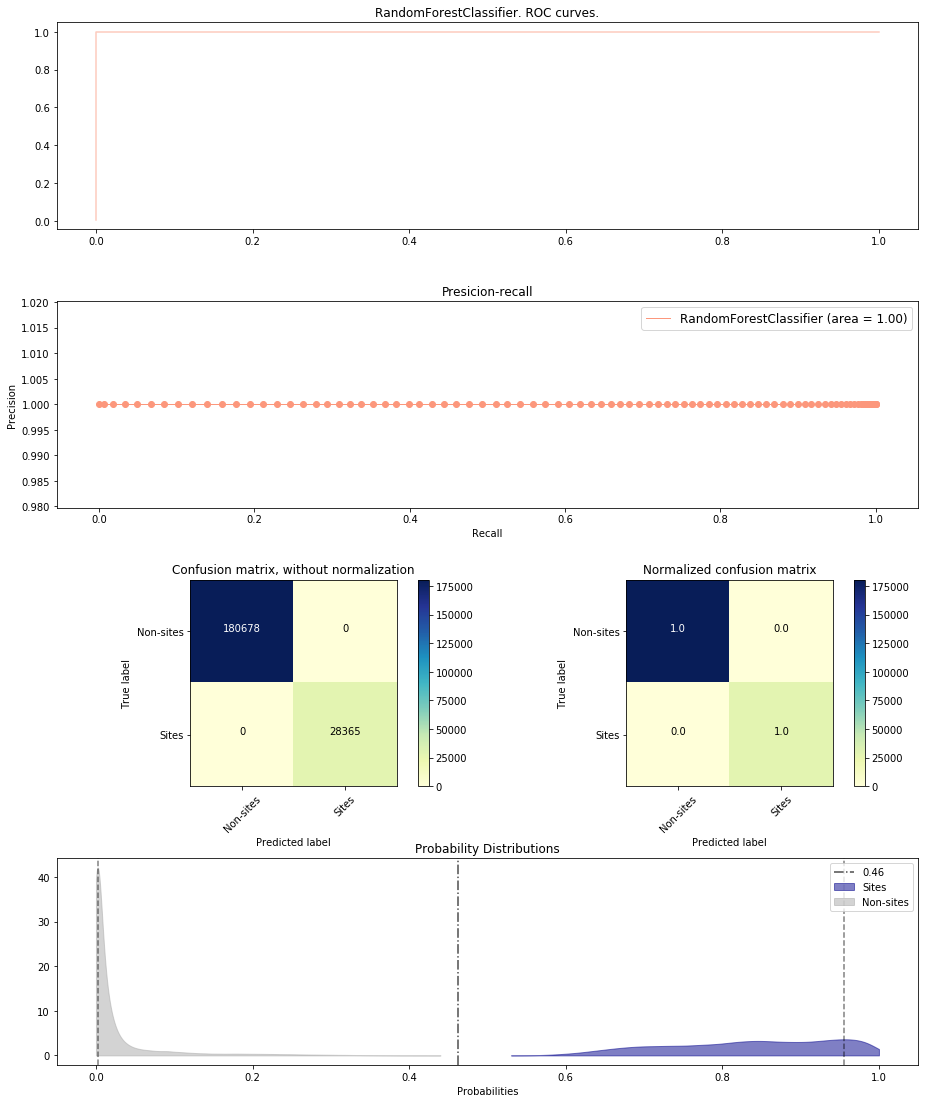

In [41]:
'''
   фунцкия класса Magnesium predict позволяет предказать с помощью натренированной модели 
   (по дефолту она берется из класса, но можно передать и извне в параметре model) на данных x, y;
   Оценить качество предсказания и построить графики. 
   Вовзращает словарь, аналогичный fit_predict.
   И по умолчанию рисует графики метрик качества, аналогичные fit_predict.
   
   Ecли y == None, все оценки качества и графики имеют значения None.
'''
predict_train =  m.predict(x = m.x, 
                           y = m.y,
                           model=m.trained_model, 
                           plots = True)
predict_test =  m.predict(x = test['x'], 
                          y = test['y'],
                          model=m.trained_model,
                          plots = False)

### Примечание

Для того, чтобы графики можно было строить в каком угодно порядке и комбинировать с другими, каждый график сохранется как список строк. Чтобы построить его, используйте функцию plot_one_plot. (P.s. она написана в файле с классом, продублирую ее здесь)

In [42]:
def plot_one_plot(plot_elements):
    [eval(plot_string) for plot_string in plot_elements]

Пример ее использования:

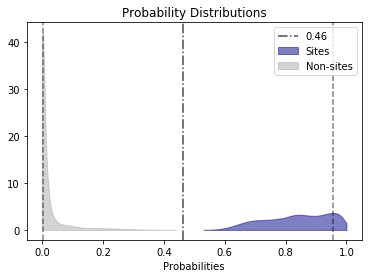

In [43]:
plot_one_plot(predict_train['plots']['prob_density'])

In [44]:
predict_test["prediction"].shape

(4045,)

In [45]:
df_submit = pd.read_csv(fold + file_submit)
df_submit["mg"] = predict_test["prediction"]
df_submit.to_csv(fold + "my_submission.csv", index=False)

In [46]:
df_submit

,Id,mg
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0
